<div class="alert alert-info" style="margin-top: 20px">
<h1>Exploratory Data Analysis on the Olympics Datasets </h1>



</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Analysis Steps</h1>

<p>1. Understanding the Question</p><p> </p>
<p>2. Collecting the Data</p><p></p>
<p>3. Cleaning the Data</p>
<p>4.Analyzing Data</p>
<p>5.Visualization</p><p>


</div>




In [49]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Step 2: Collect and import Data. </h1> <p>Getting some Infomation about the Original data before doing anything to it </p>,</div>

In [50]:
#data importation
data = pd.read_csv('Olympics.csv')
#show first five rows
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [51]:
#shows last five rows
data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [52]:
#show the exact number of columns and rows 
data.shape

(271116, 15)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [54]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Step 3: Data Cleaning </h1> ,</div>

Handling Missing Data

In [55]:
missing_data = data.isnull()
missing_data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [56]:
#checking for missing data points
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [57]:
#replace all missing data points with NaN
data = data.fillna("NaN")

In [58]:
#in order to replace the missing values with the mean of the column, first Calculate the mean of Age
mean = data["Age"].astype("float").mean(axis=0)
print("Average of Age:", mean)

Average of Age: 25.556898357297374


the agerage of Age column is 25.556 approxiately 25

In [59]:
#Relacing the missing data value in the Age column with the mean calculated above.
data['Age'].replace(np.nan, mean, inplace=True)

In [60]:
#now check the Age column for missing datab
data['Age'].isnull().sum()

0

In [61]:
#Calculate the mean of height
mean = data["Height"].astype("float").mean(axis=0)
print("Average of Height:", mean)

Average of Height: 175.33896987366376


the agerage of Height column is 175.33 approxiately 175

In [62]:
#Relaving the missing data values in the Height column with the mean calculated above.
data['Height'].replace('NaN', mean, inplace=True)

In [63]:
#now check the Height column for missing data
data['Height'].isnull().sum()

0

In [64]:
#Calculate the mean of Weight
mean = data["Weight"].astype("float").mean(axis=0)
print("Average of Weight:", mean)

Average of Weight: 70.70239290053351


the agerage of Weight column is 70.70 approxiately 71

In [65]:
#Relaving the missing data values in the Weight column with the mean calculated above.
data['Weight'].replace('NaN', mean, inplace=True)

In [66]:
#now check the Weight column for missing data
data['Weight'].isnull().sum()

0

In [67]:
#there are some NaN in the Medal columns, which mean some Athletes didnt win any medal at all; so replace them with "NoMedal"
data['Medal'].replace('NaN', 'No_medal', inplace=True)

In [68]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_medal


In [69]:
#checking 
missing_data = data.isnull()
missing_data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Handling Duplicates

In [71]:
data.duplicated().sum()

1385

There are 1385 duplicates

In [72]:
#Removing Dupliactes
data = data.drop_duplicates()

In [73]:
data.duplicated().sum()

0

Duplicates Removed. 

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Step 4 : Analyze Data. </h1> <p></p></div>

question One : what is the total Number of Atletes attended the 1990 Olympics?
    Total of 269731 Athletes participated in the olympics 

In [154]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [74]:
data.shape

(269731, 15)

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Weight'}>,
        <AxesSubplot: title={'center': 'Year'}>]], dtype=object)

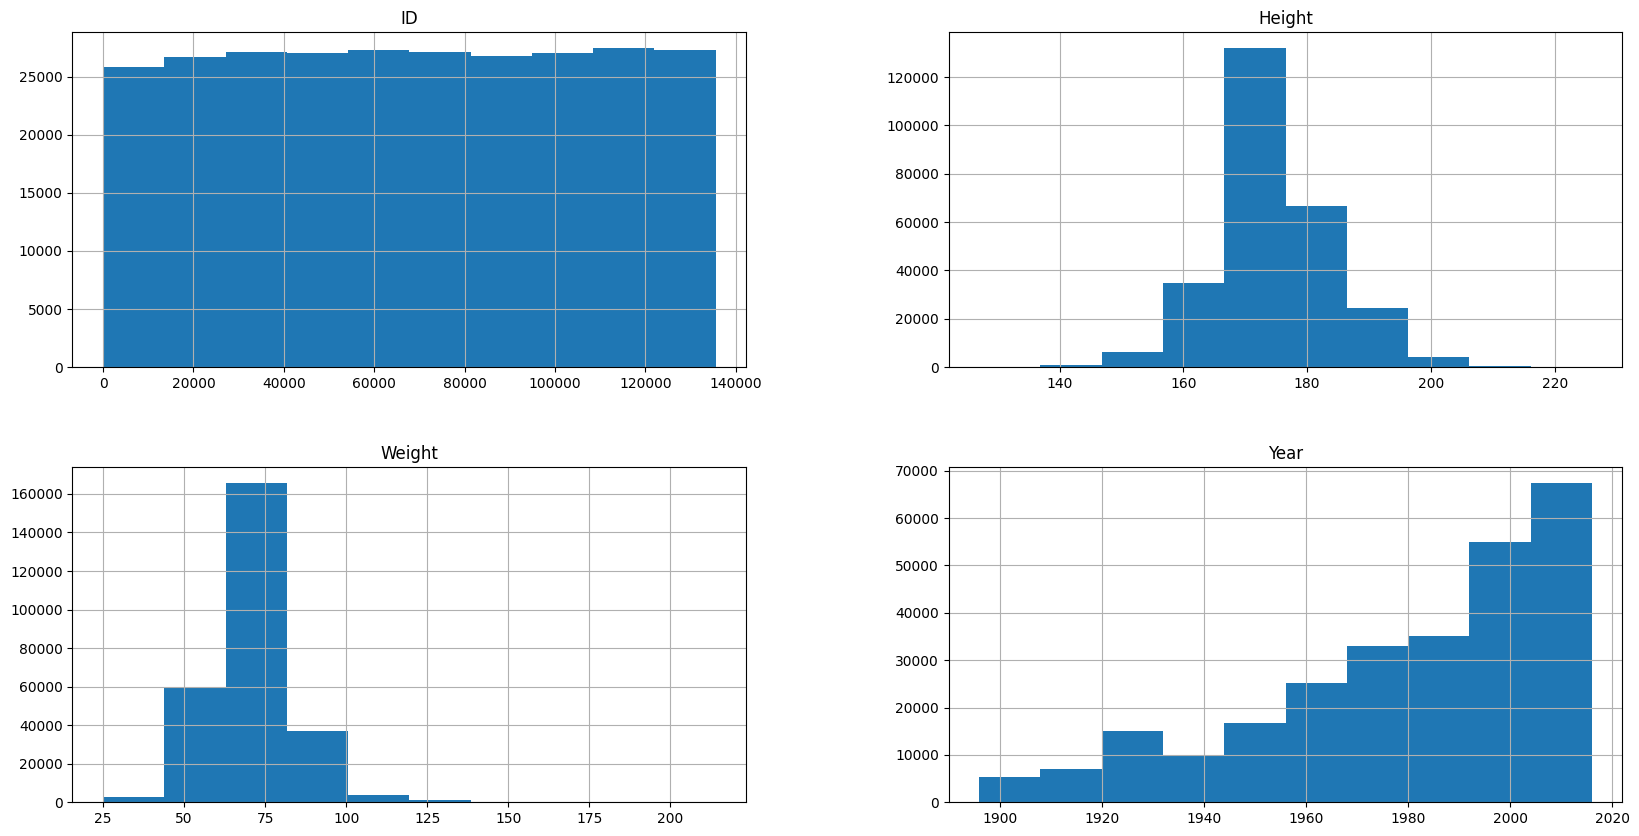

In [134]:
data.hist(figsize=(20,10))

In [75]:
#top 10 Games 
games = data['Games'].value_counts()
games.head(10)


2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
Name: Games, dtype: int64

In [76]:
data['Medal'].value_counts()

No_medal    229959
Gold         13369
Bronze       13295
Silver       13108
Name: Medal, dtype: int64

In [77]:
data[data['Medal']=='Gold']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.00000,90.000000,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,167.00000,60.000000,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.00000,93.000000,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.00000,93.000000,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


there are 13369 Gold medalist in the History of Olympics games

In [78]:
year1996 = data[data['Year'] == 1996]
Y1996 = year1996[year1996['Medal']=='Gold'].value_counts()
Y1996.value_counts()

1    608
dtype: int64

there are 608 Gold Medalist in the 1996 Olymoics Games

In [79]:
year2012 = data[data['Year'] == 2012]
Y2012 = year2012[year2012['Medal']=='Gold'].value_counts()
Y2012.value_counts()

1    632
dtype: int64

there were 632 Gold medalist in 2012.

In [80]:
year2016 = data[data['Year'] == 2016]
Y2016 = year2016[year2016['Medal']=='Gold'].value_counts()
Y2016.value_counts()

1    665
dtype: int64

there are 665 Gold medalist in 2016

In [81]:
Year2016 = data[data['Year'] == 2016]
Year2016.value_counts()

ID      Name                            Sex  Age   Height     Weight      Team     NOC  Games        Year  Season  City            Sport          Event                                        Medal   
22      Andreea Aanei                   F    22.0  170.00000  125.000000  Romania  ROU  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting  Weightlifting Women's Super-Heavyweight      No_medal    1
91043   Pang Wei                        M    30.0  178.00000  77.000000   China    CHN  2016 Summer  2016  Summer  Rio de Janeiro  Shooting       Shooting Men's Free Pistol, 50 metres        No_medal    1
91120   Kseniya Hennadivna Panteleieva  F    22.0  168.00000  75.000000   Ukraine  UKR  2016 Summer  2016  Summer  Rio de Janeiro  Fencing        Fencing Women's epee, Individual             No_medal    1
                                                                                                                                                  Fencing Women's epee, Team             

In [82]:
Nigerians = data[data['Team'] == 'Nigeria']
Nigerians = Nigerians.value_counts()
Nigerians.value_counts()

1    862
dtype: int64

In [83]:
Medal = data['Medal'].value_counts().to_frame()
Medal.rename(columns={'Medal': 'counts'}, inplace=True)
Medal.index.name = 'Medal'
Medal


,counts
Medal,
No_medal,229959
Gold,13369
Bronze,13295
Silver,13108


In [84]:
#Various Games and the Numbers of particippant per time
Games = data['Games'].value_counts().to_frame()
Games.rename(columns={'Games': 'counts'}, inplace=True)
Games.index.name = 'Games'
Games


,counts
Games,
2000 Summer,13821
1996 Summer,13780
2016 Summer,13688
2008 Summer,13602
2004 Summer,13443
...,...
1936 Winter,895
1928 Winter,582
1924 Winter,460


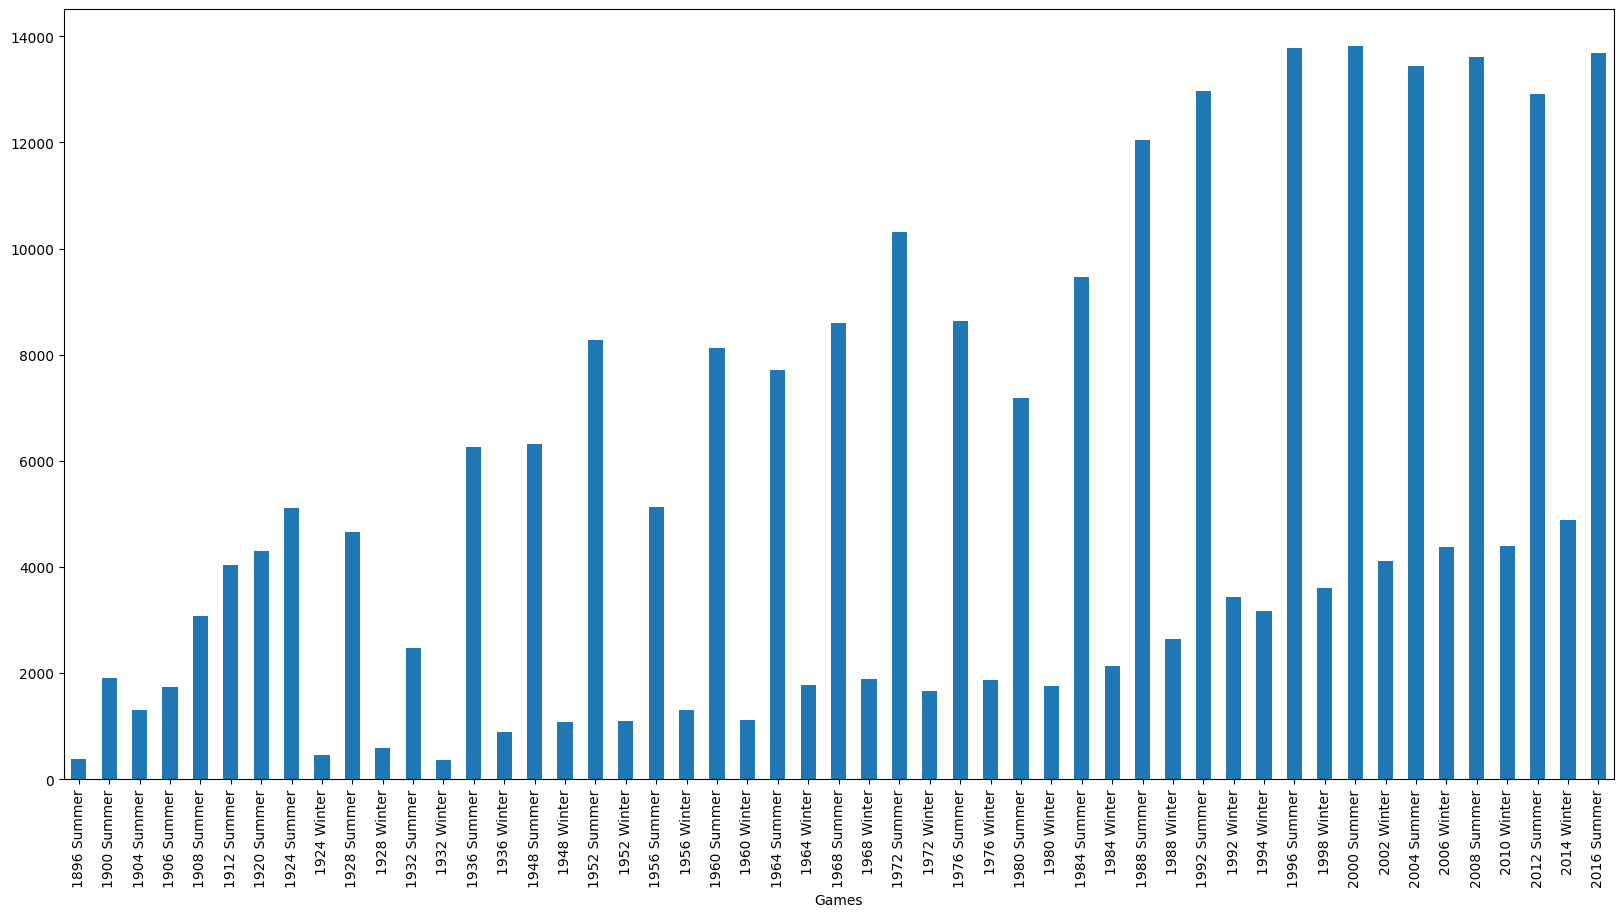

In [155]:
games = data.groupby(['Games'])['ID'].count().plot(kind='bar', figsize=(20,10),ax=plt.gca())

In [85]:
#Top 10 most participated Sports
Sports = data['Sport'].value_counts().to_frame()
Sports.rename(columns={'Sport': 'counts'}, inplace=True)
Sports.index.name = 'Sports'
top10Sports = Sports.head(10)
top10Sports

,counts
Sports,
Athletics,38624
Gymnastics,26707
Swimming,23195
Shooting,11448
Cycling,10827
Fencing,10735
Rowing,10595
Cross Country Skiing,9133
Alpine Skiing,8829


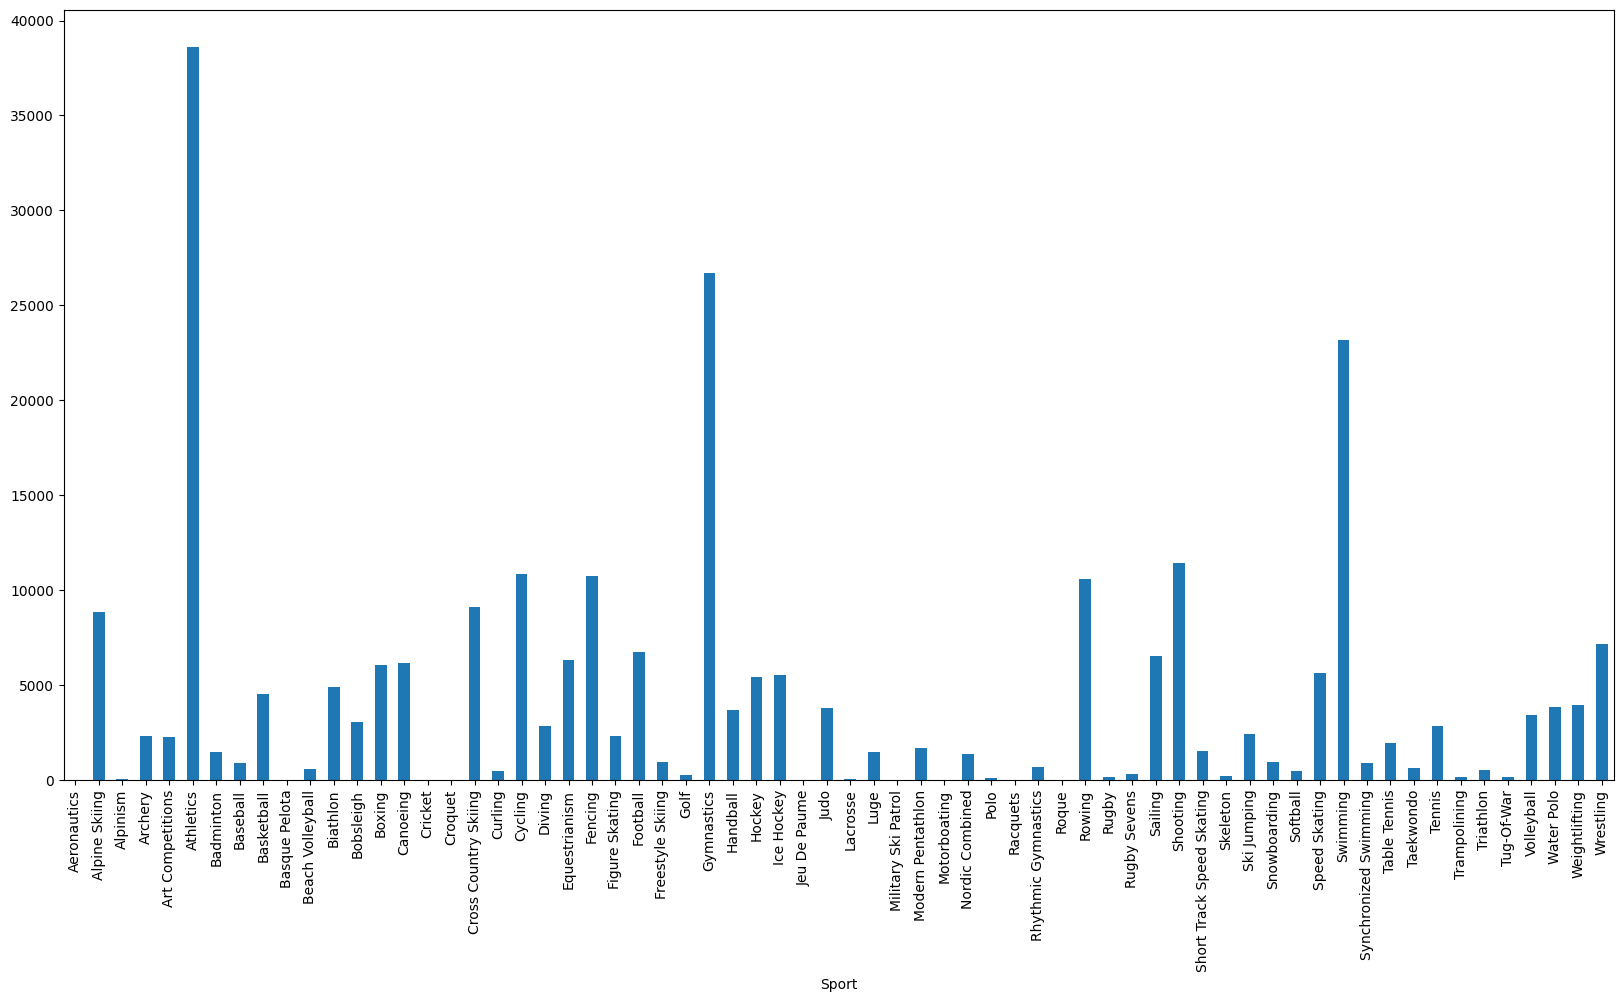

In [136]:
import matplotlib.pyplot as plt
playerssports = data.groupby(['Sport'])['ID'].count().plot(kind='bar', figsize=(20,10),ax=plt.gca())

In [86]:
Sex = data['Sex'].value_counts().to_frame()
Sex.rename(columns={'Sex': 'counts'}, inplace=True)
Sex.index.name = 'Sex'
Sex


,counts
Sex,
M,195353
F,74378


Text(0.5, 1.0, 'Sex bins')

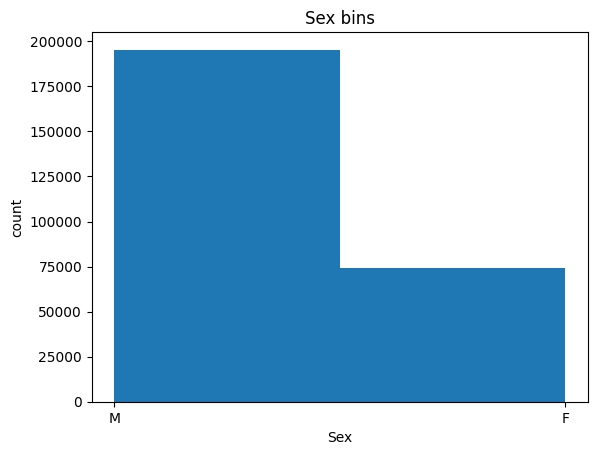

In [87]:
from matplotlib import pyplot
plt.pyplot.hist(data["Sex"], bins = 2)

# set x/y labels and plot title
pyplot.xlabel("Sex")
pyplot.ylabel("count")
pyplot.title("Sex bins")

In [137]:
Age = data['Age'].value_counts().to_frame()
Age.rename(columns={'Age': 'counts'}, inplace=True)
Age.index.name = 'Age'
Age.head(20)


,counts
Age,
23.0,21863
24.0,21700
22.0,20804
25.0,19699
21.0,19163
...,...
32.0,6227
17.0,5376
33.0,4778


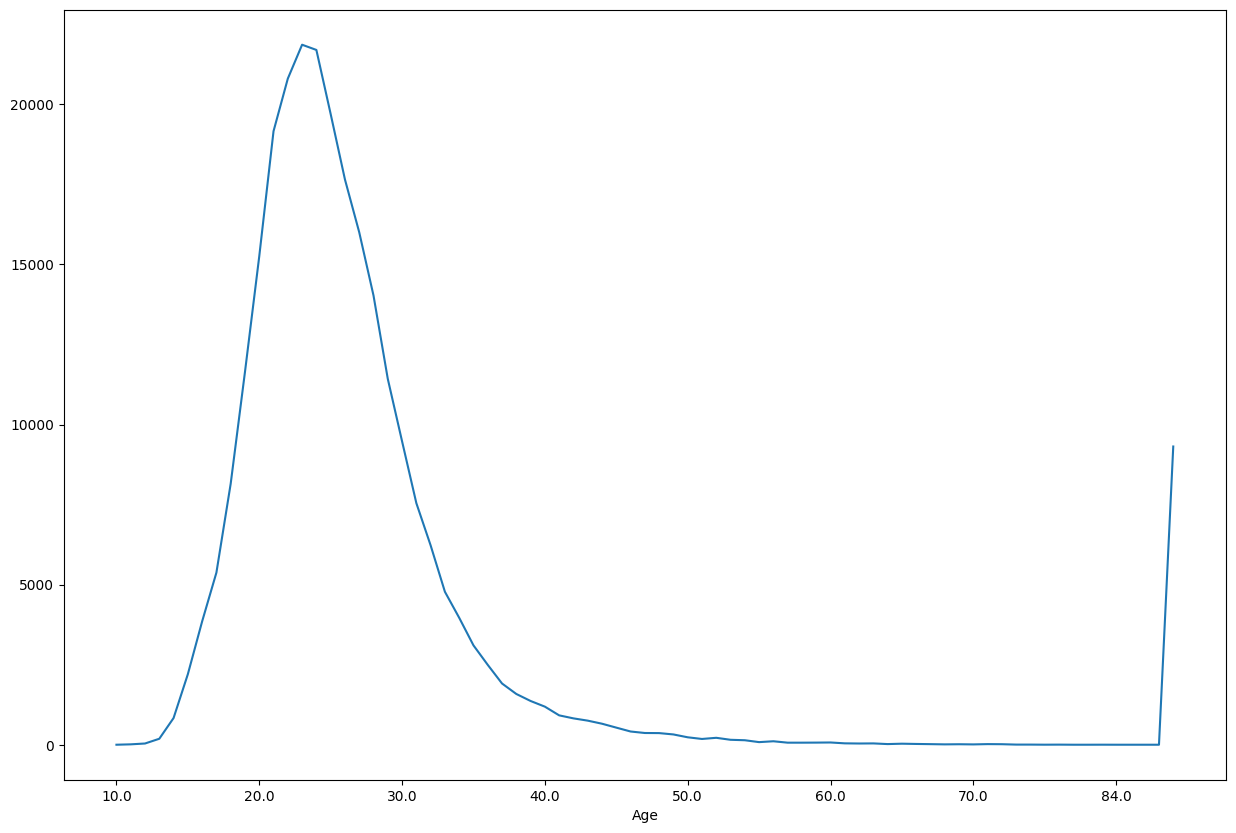

In [139]:
#age distribution
sex = data.groupby(['Age'])['ID'].count().plot(kind='line', figsize=(15,10),ax=plt.gca())

In [102]:
#Percentage of age group
#data[['Age']].dropna()
#data[['Age']].isnull().sum()
#data[['Age']]=data[['Age']].apply(pd.to_numeric)
#data['percent']=(data['Age']/data['Age'].sum()) * 100

In [122]:
# grouping Medals
df_gptest = data[['ID','Sex','Sport','Medal']]
grouped_test1 = df_gptest.groupby(['Medal'],as_index=False).mean()
Group = grouped_test1.sort_values('ID',ascending=False)
Group.round()

,Medal,ID
0,Bronze,69612.0
1,Gold,69365.0
3,Silver,69246.0
2,No_medal,68067.0


In [175]:
Medaltable = pd.pivot_table(data, index=['Team'] ,columns=['Medal'], aggfunc={'Medal': 'size'}, fill_value=0)
Medaltable

Medal                     
Medal                 Bronze Gold No_medal Silver
Team                                             
30. Februar                0    0        2      0
A North American Team      4    0        0      0
Acipactli                  0    0        3      0
Acturus                    0    0        2      0
Afghanistan                2    0      124      0
...                      ...  ...      ...    ...
Zambia                     1    0      181      1
Zefyros                    0    0        2      0
Zimbabwe                   1   17      287      4
Zut                        0    0        0      3
rn-2                       0    0        5      0

[1184 rows x 4 columns]

In [169]:
#Various Teams and the Numbers of particippant per time
Team = data['Team'].value_counts().to_frame()
Team.rename(columns={'Team': 'counts'}, inplace=True)
Team.index.name = 'Team'
Team.head(20)


,counts
Team,
United States,17598
France,11817
Great Britain,11264
Italy,10213
Germany,9230
...,...
Spain,5224
China,4975
Russia,4922


In [156]:
#Various Team and the Numbers of particippant per time
City = data['City'].value_counts().to_frame()
City.rename(columns={'City': 'counts'}, inplace=True)
Games.index.name = 'City'
City


,counts
London,22297
Athina,15556
Sydney,13821
Atlanta,13780
Rio de Janeiro,13688
...,...
St. Louis,1301
Squaw Valley,1116
Oslo,1088
Garmisch-Partenkirchen,895


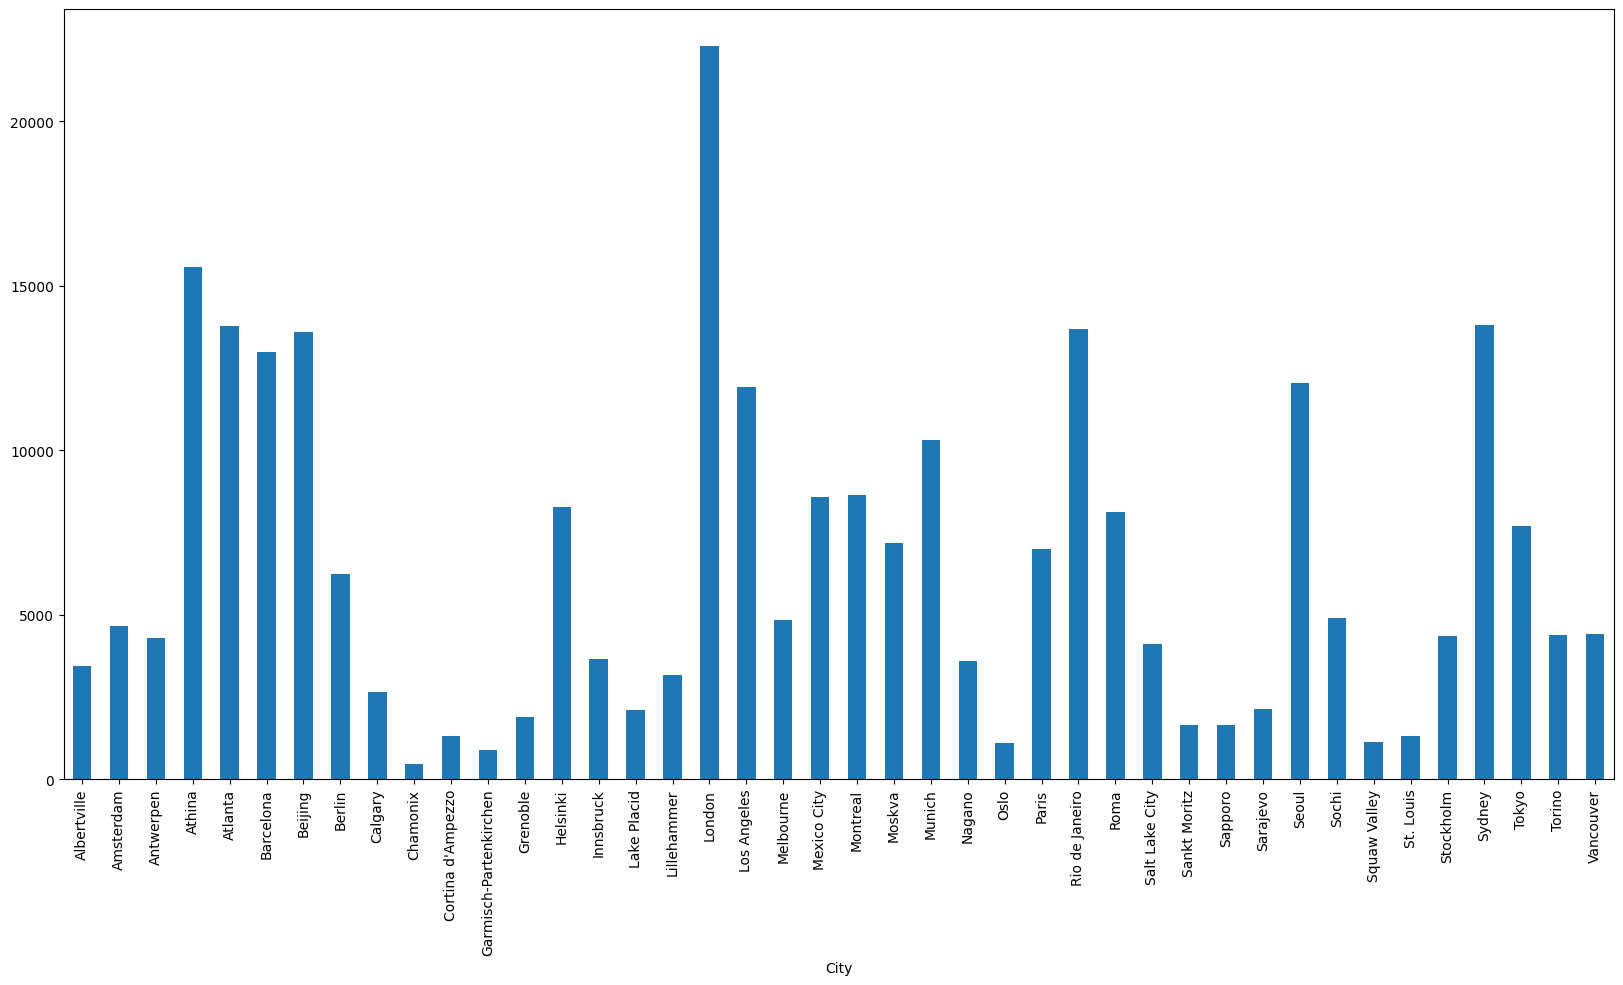

In [157]:
City = data.groupby(['City'])['ID'].count().plot(kind='bar', figsize=(20,10),ax=plt.gca())